In [13]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [14]:
file_path = "1976-2022-house.tab"
df = pd.read_csv(file_path, sep='\t')

In [15]:
df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version,fusion_ticket
0,1976,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,False,False,BILL DAVENPORT,DEMOCRAT,False,TOTAL,58906,157170,False,20230706,False
1,1976,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,False,False,JACK EDWARDS,REPUBLICAN,False,TOTAL,98257,157170,False,20230706,False
2,1976,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,False,False,WRITEIN,NaN,True,TOTAL,7,157170,False,20230706,False
3,1976,ALABAMA,AL,1,63,41,US HOUSE,2,GEN,False,False,J CAROLE KEAHEY,DEMOCRAT,False,TOTAL,66288,156362,False,20230706,False
4,1976,ALABAMA,AL,1,63,41,US HOUSE,2,GEN,False,False,"WILLIAM L \BILL\"" DICKINSON""",REPUBLICAN,False,TOTAL,90069,156362,False,20230706,False


GIS Data Info:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   GISJOIN     52 non-null     object  
 1   REGION      52 non-null     object  
 2   DIVISION    52 non-null     object  
 3   STATEFP     52 non-null     object  
 4   STATENS     52 non-null     object  
 5   GEOID       52 non-null     object  
 6   STUSPS      52 non-null     object  
 7   NAME        52 non-null     object  
 8   LSAD        52 non-null     object  
 9   MTFCC       52 non-null     object  
 10  FUNCSTAT    52 non-null     object  
 11  ALAND       52 non-null     float64 
 12  AWATER      52 non-null     float64 
 13  INTPTLAT    52 non-null     object  
 14  INTPTLON    52 non-null     object  
 15  Shape_Leng  52 non-null     float64 
 16  Shape_Area  52 non-null     float64 
 17  geometry    52 non-null     geometry
dtypes: float64(4), geometry(1), o

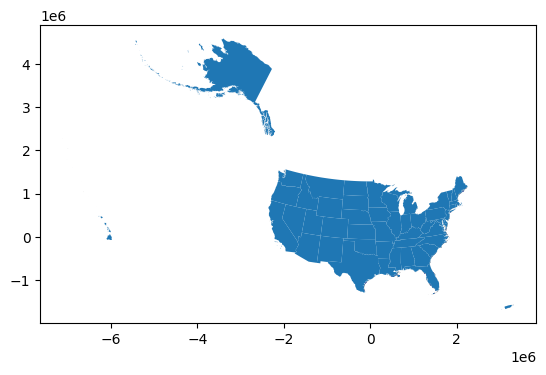

In [18]:
# Load GIS shapefile
gis_data = gpd.read_file("assets/US_state_2020.shp")

# Load tabular data
tabular_data = pd.read_csv("1976-2022-house.tab", delimiter='\t')

# Explore data structure
print("GIS Data Info:")
print(gis_data.info())
print(gis_data.head())
print("\nTabular Data Info:")
print(tabular_data.info())

# Combine state and district columns to create a unique identifier in tabular_data
tabular_data['district_id'] = tabular_data['state'] + '_' + tabular_data['district'].astype(str)

# Combine STATEFP and NAME columns to create a unique identifier in gis_data
gis_data['district_id'] = gis_data['STATEFP'] + '_' + gis_data['NAME']

# Join the datasets on the newly created district_id column
merged_data = pd.merge(gis_data, tabular_data, on='district_id', how='inner')

# Plot the GeoDataFrame
gis_data.plot()

# Show the plot
plt.show()

In [19]:
# # Calculate the percentage of votes for each candidate in each district
# candidate_votes = tabular_data.groupby(['district_id', 'candidate'])['candidatevotes'].sum().unstack(fill_value=0)
# district_total_votes = candidate_votes.sum(axis=1)
# percentage_votes = candidate_votes.div(district_total_votes, axis=0) * 100

# # Identify the most popular candidate in each district
# most_popular_candidate = percentage_votes.idxmax(axis=1)
# percentage_votes['most_popular_candidate'] = most_popular_candidate

# # Define a function to lookup the percentage of votes for the most popular candidate
# def lookup_percentage(row):
#     return row[row['most_popular_candidate']]

# # Determine the percentage of votes for the most popular candidate
# percentage_votes['percentage_most_popular'] = percentage_votes.apply(lookup_percentage, axis=1)

# # Plot the map and fill polygons with colors based on the percentage of votes for the most popular candidate
# fig, ax = plt.subplots(1, 1)
# merged_data.plot(column='percentage_most_popular', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8')
# ax.set_title('Percentage of Votes for the Most Popular Candidate')
# plt.show()

